In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# clone the github repo
!git clone https://github.com/IamGiel/gg.git


Cloning into 'gg'...
remote: Enumerating objects: 429, done.
remote: Counting objects: 100% (429/429), done.
remote: Compressing objects: 100% (418/418), done.
remote: Total 429 (delta 41), reused 394 (delta 9), pack-reused 0
Receiving objects: 100% (429/429), 13.33 MiB | 38.24 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [3]:
from pathlib import Path

gg_path = '/content/gg/gg/' # this is the path to the images
gg_test_path = '/content/gg/gg_test/' # this is the path to the images

data_dir = Path(gg_path)
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)
data_dir


0


PosixPath('/content/gg/gg')

In [4]:
# list the classes

class_names = np.array([item.name for item in data_dir.glob('validation/*') if item.is_dir()])
print(class_names)

['spy' 'flag' 'four_star_general' 'captain' 'one_star_general'
 'second_lieut' 'two_star_general' 'five_star_general'
 'three_star_general' 'seargent' 'colonel' 'lt_colonel' 'private'
 'first_lieut' 'major']


# PREPARE THE TRAINING AND VALIDATION DATA SET

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and batch size
img_height = 180
img_width = 180
batch_size = 15


In [ ]:
# import numpy as np

# # Get the original class names
# class_names = ['flag_1', 'private_2', 'seargent_3', 'second_lieut_4', 'first_lieut_5',
#     'captain_6', 'major_7', 'lt_colonel_8', 'colonel_9',
#     'one_star_general_10', 'two_star_general_11', 'three_star_general_12',
#     'four_star_general_13', 'five_star_general_14', 'spy_15']

# # Assuming train_ds is your image dataset
# for images, labels in train_val_ds:
#     # Extract class indices from one-hot encoded labels
#     class_indices = np.argmax(labels, axis=1)

#     # Extract class ranks from class names
#     class_ranks = [int(class_name.split('_')[-1]) for class_name in class_names]

#     # Use class ranks as needed
#     print(class_ranks)
#     break



In [6]:
import os
from PIL import Image
import numpy as np

class_names = ['flag', 'private', 'seargent', 'second_lieut', 'first_lieut',
    'captain', 'major', 'lt_colonel', 'colonel',
    'one_star_general', 'two_star_general', 'three_star_general',
    'four_star_general', 'five_star_general', 'spy']

# Get the sorted list of class names based on the order of ranks
sorted_class_names = sorted(class_names)

all_images = []
all_labels = []

for class_name in class_names:
    # print(f'classnames {class_name}')
    class_path = os.path.join(gg_path + 'train', class_name)

    # print(f'class_path {class_path}')
    # Sort the file names within each class directory
    sorted_image_names = sorted(os.listdir(class_path))
    # print(f'sorted_image_names {sorted_image_names}')

    for image_name in sorted_image_names:
        # print(f'image_name {image_name}')
        image_path = os.path.join(class_path, image_name)
        # print(f'image_path {image_path}')
        # Load image and convert it to numpy array
        img = Image.open(image_path)
        img_array = np.array(img)

        all_images.append(image_path)  # Store the file path, not the image array
        all_labels.append(class_name)

# Convert the list of labels to numpy array
all_labels = np.array(all_labels)

all_labels
# all_images
# sorted_class_names

array(['flag', 'flag', 'flag', 'flag', 'flag', 'flag', 'private',
       'private', 'private', 'private', 'private', 'private', 'seargent',
       'seargent', 'seargent', 'seargent', 'seargent', 'seargent',
       'second_lieut', 'second_lieut', 'second_lieut', 'second_lieut',
       'second_lieut', 'second_lieut', 'first_lieut', 'first_lieut',
       'first_lieut', 'first_lieut', 'first_lieut', 'first_lieut',
       'captain', 'captain', 'captain', 'captain', 'captain', 'captain',
       'major', 'major', 'major', 'major', 'major', 'major', 'lt_colonel',
       'lt_colonel', 'lt_colonel', 'lt_colonel', 'lt_colonel',
       'lt_colonel', 'colonel', 'colonel', 'colonel', 'colonel',
       'colonel', 'colonel', 'one_star_general', 'one_star_general',
       'one_star_general', 'one_star_general', 'one_star_general',
       'one_star_general', 'two_star_general', 'two_star_general',
       'two_star_general', 'two_star_general', 'two_star_general',
       'two_star_general', 'three_star_g

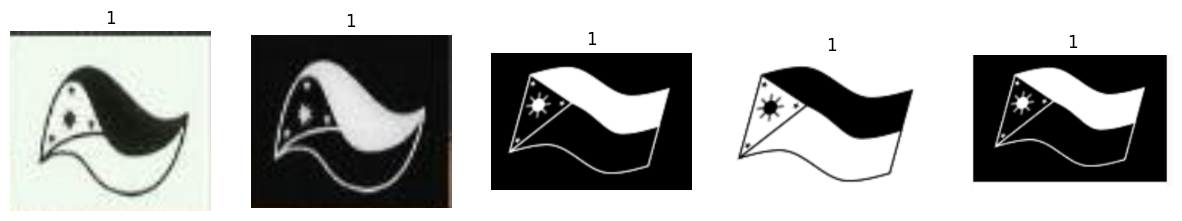

In [7]:
import matplotlib.pyplot as plt
from PIL import Image

# Assuming all_images and all_labels are already defined

# Define a function to load and plot images with their labels
def plot_images(image_paths, labels, class_names, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        # Load the image using PIL
        img = Image.open(image_paths[i])

        # Display the image
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(class_names.index(labels[i]) + 1)  # Add 1 to match the class ranks
        plt.axis("off")
    plt.show()

# Plot a few images with their labels
plot_images(all_images, all_labels, class_names)


# CREATE THE MODEL

In [8]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the VGG16 model pre-trained on ImageNet data
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.7))
model.add(Dense(15, activation='softmax'))


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Create an ImageDataGenerator with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    # validation_split=0.2,
)

# Training dataset
train_ds = datagen.flow_from_directory(
    gg_path + 'train',  # Path to the training directory
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    # subset='training'  # Subset for training
)

# Validation dataset
val_ds = datagen.flow_from_directory(
    gg_path + 'validation',  # Path to the validation directory
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    # subset='validation'  # Subset for validation
)

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 256)               3277056   
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 15)                38

In [9]:
# Number of epochs
epochs = 30


Epoch 1/30
6/6 [==============================] - 82s 15s/step - loss: 3.8155 - accuracy: 0.1333 - val_loss: 2.9328 - val_accuracy: 0.2444
Epoch 2/30
6/6 [==============================] - 62s 11s/step - loss: 2.5054 - accuracy: 0.3889 - val_loss: 2.7849 - val_accuracy: 0.2333
Epoch 3/30
6/6 [==============================] - 72s 13s/step - loss: 1.9469 - accuracy: 0.4444 - val_loss: 2.4682 - val_accuracy: 0.3889
Epoch 4/30
6/6 [==============================] - 73s 13s/step - loss: 1.7904 - accuracy: 0.4333 - val_loss: 2.3864 - val_accuracy: 0.4000
Epoch 5/30
6/6 [==============================] - 72s 13s/step - loss: 1.5625 - accuracy: 0.5444 - val_loss: 2.0789 - val_accuracy: 0.4222
Epoch 6/30
6/6 [==============================] - 75s 14s/step - loss: 1.4708 - accuracy: 0.5556 - val_loss: 2.2242 - val_accuracy: 0.4111
Epoch 7/30
6/6 [==============================] - 72s 13s/step - loss: 1.2543 - accuracy: 0.6000 - val_loss: 2.1332 - val_accuracy: 0.4778
Epoch 8/30
6/6 [===========

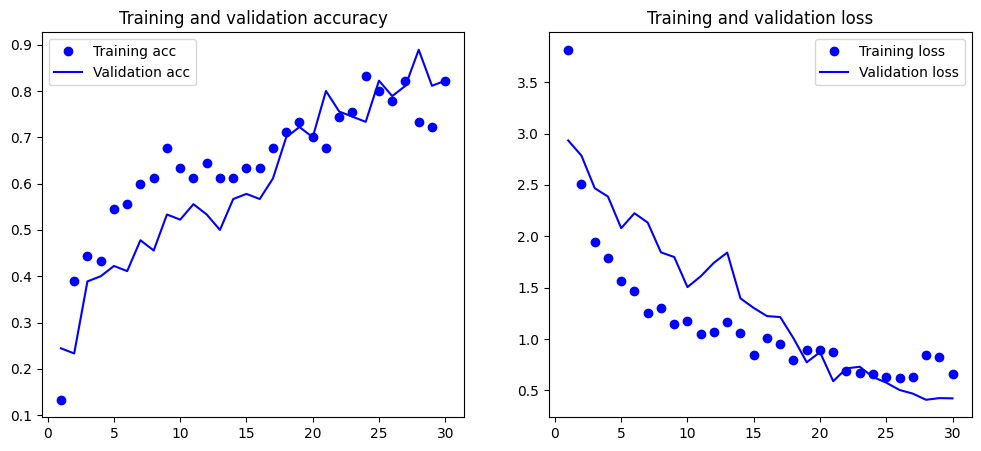

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='accuracy',   # Choose the metric to monitor (e.g., validation loss)
    patience=9,            # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Continue with model training using the updated data generator
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)


# Plot training history
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history.get('val_accuracy', None)  # Use get to handle missing key
    loss = history.history['loss']
    val_loss = history.history.get('val_loss', None)  # Use get to handle missing key

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Plot training and validation accuracy if available
    if val_acc is not None:
        plt.subplot(1, 2, 1)
        plt.plot(epochs, acc, 'bo', label='Training acc')
        plt.plot(epochs, val_acc, 'b', label='Validation acc')
        plt.title('Training and validation accuracy')
        plt.legend()

    # Plot training and validation loss if available
    if val_loss is not None:
        plt.subplot(1, 2, 2)
        plt.plot(epochs, loss, 'bo', label='Training loss')
        plt.plot(epochs, val_loss, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()

    plt.show()

# Call the function with the training history
plot_training_history(history)


In [11]:
    #  get the shape of our images
input_size = train_ds.image_shape  # This will give you the dimensions of your input images
output_size = 15 # this is the number of ranks
input_size

(180, 180, 3)

In [12]:
print("Model Output Shape:", model.output_shape)
print("Target Labels Shape:", train_ds[0][1].shape)


Model Output Shape: (None, 15)
Target Labels Shape: (15, 15)


In [13]:
# lets save our model
model.save('our_model.h5')
model.save('our_model.keras')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
# lets find our model
!ls


gg  our_model.h5  our_model.keras  sample_data


In [15]:
# Just a way to save our model in our local computer

from google.colab import files

files.download('our_model.keras')
files.download('our_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# TESTING OUR MODEL

In [ ]:
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model('our_model.h5')


In [ ]:
# prompt: check if we have loaded our model

model.summary()
print(model.name)


In [ ]:
print(gg_test_path)

# Use ImageDataGenerator for preprocessing
test_datagen = ImageDataGenerator(
    rescale=1./255,
    # Add other preprocessing parameters if needed
)

# Flow from directory for the test data
test_generator = test_datagen.flow_from_directory(
    gg_test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Set to False to maintain order for evaluation
)


# Load the pre-trained model
model = load_model('our_model.keras')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')



In [ ]:
# lets see which images are misclassified

predictions = model.predict(val_ds)

predicted_labels = np.argmax(predictions, axis=1)
true_labels = val_ds.classes
misclassifications = np.where(predicted_labels != true_labels)[0]


1/1 [==============================] - 0s 432ms/step


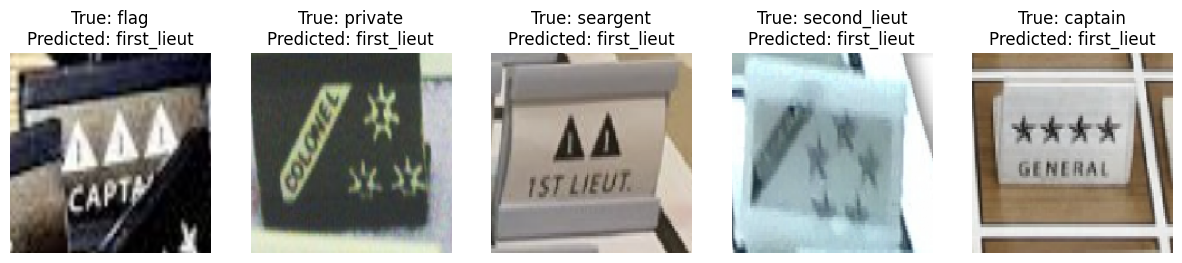

In [ ]:
from tensorflow.keras.preprocessing import image

def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Rescale to [0, 1]
    return img_array

# Display misclassified images
plt.figure(figsize=(15, 5))
for i, misclassified_index in enumerate(misclassifications[:5]):
    image_path = val_ds.filepaths[misclassified_index]
    img = load_and_preprocess_image(image_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img[0])
    plt.title(f"True: {class_names[true_labels[misclassified_index]]}\nPredicted: {class_names[predicted_labels[misclassified_index]]}")
    plt.axis("off")
plt.show()
